<a href="https://colab.research.google.com/github/sanailahii/OIBSIP/blob/main/UNEMPLOYMENT_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
data_1 = pd.read_csv('/content/Unemployment in India.csv')
data_2 = pd.read_csv('/content/Unemployment_Rate_upto_11_2020.csv')

In [38]:
#Loading the data into dataframes
data_1.info()
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                  

In [39]:
print(data_1.head())
print(data_2.head())

           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  
           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0 

In [40]:
data_1_regions = data_1['Region'].unique()
data_2_regions = data_2['Region'].unique()

In [41]:
#Unique regions in each dataset
regions_overlap = set(data_1_regions).intersection(data_2_regions)
regions_only_in_data_1 = set(data_1_regions) - set(data_2_regions)
regions_only_in_data_2 = set(data_2_regions) - set(data_1_regions)

print("Regions in both datasets:", regions_overlap)
print("Regions only in first dataset:", regions_only_in_data_1)
print("Regions only in second dataset:", regions_only_in_data_2)

Regions in both datasets: {'Odisha', 'Madhya Pradesh', 'Rajasthan', 'Tamil Nadu', 'Chhattisgarh', 'Haryana', 'Gujarat', 'Maharashtra', 'Telangana', 'Delhi', 'Goa', 'Bihar', 'Himachal Pradesh', 'Puducherry', 'Tripura', 'Andhra Pradesh', 'Uttarakhand', 'Sikkim', 'Jharkhand', 'Jammu & Kashmir', 'Meghalaya', 'Kerala', 'Karnataka', 'West Bengal', 'Assam', 'Uttar Pradesh', 'Punjab'}
Regions only in first dataset: {'Chandigarh', nan}
Regions only in second dataset: set()


In [42]:
#finding the range of each dataset
data_1[' Date'] = pd.to_datetime(data_1[' Date'])
data_2[' Date'] = pd.to_datetime(data_2[' Date'])

print("First dataset date range:", data_1[' Date'].min(), "to", data_1[' Date'].max())
print("Second dataset date range:", data_2[' Date'].min(), "to", data_2[' Date'].max())

First dataset date range: 2019-05-31 00:00:00 to 2020-06-30 00:00:00
Second dataset date range: 2020-01-31 00:00:00 to 2020-10-31 00:00:00


<ipython-input-42-a9cdc958f65e>:2: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data_1[' Date'] = pd.to_datetime(data_1[' Date'])
<ipython-input-42-a9cdc958f65e>:3: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data_2[' Date'] = pd.to_datetime(data_2[' Date'])


**Overlapping range:
2020-01-31 to 2020-06-30**

In [43]:
#Removing any leading/trailing spaces
data_1.columns = data_1.columns.str.strip()
data_2.columns = data_2.columns.str.strip()

In [44]:
#Rename columns if necessary
data_1.rename(columns={' Date': 'Date'}, inplace=True)

In [45]:
#Ensure that the 'Date' column is in datetime format in both datasets.
data_1['Date'] = pd.to_datetime(data_1['Date'])
data_2['Date'] = pd.to_datetime(data_2['Date'])

In [46]:
#Concatenate the datasets
combined_data = pd.concat([data_1, data_2], ignore_index=True)

In [47]:
#Removing duplicates
combined_data.drop_duplicates(subset=['Region', 'Date'], keep='last', inplace=True)

In [48]:
#Analyzing the Unemployment Rate before and after Covid-19
pre_covid = combined_data[combined_data['Date'] < '2020-03-01']
post_covid = combined_data[combined_data['Date'] >= '2020-03-01']

In [49]:
#Calculate average Unemployment Rate
avg_pre_covid = pre_covid['Estimated Unemployment Rate (%)'].mean()
avg_post_covid = post_covid['Estimated Unemployment Rate (%)'].mean()

print(f"Average Unemployment Rate Before COVID-19: {avg_pre_covid}")
print(f"Average Unemployment Rate After COVID-19: {avg_post_covid}")

Average Unemployment Rate Before COVID-19: 10.456425992779783
Average Unemployment Rate After COVID-19: 12.976405529953917


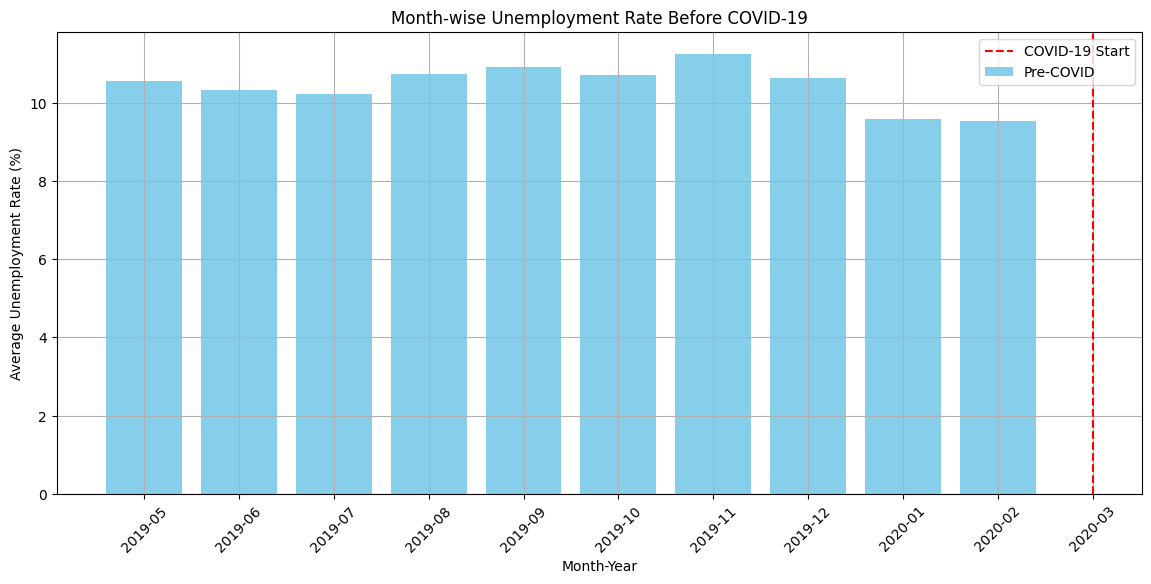

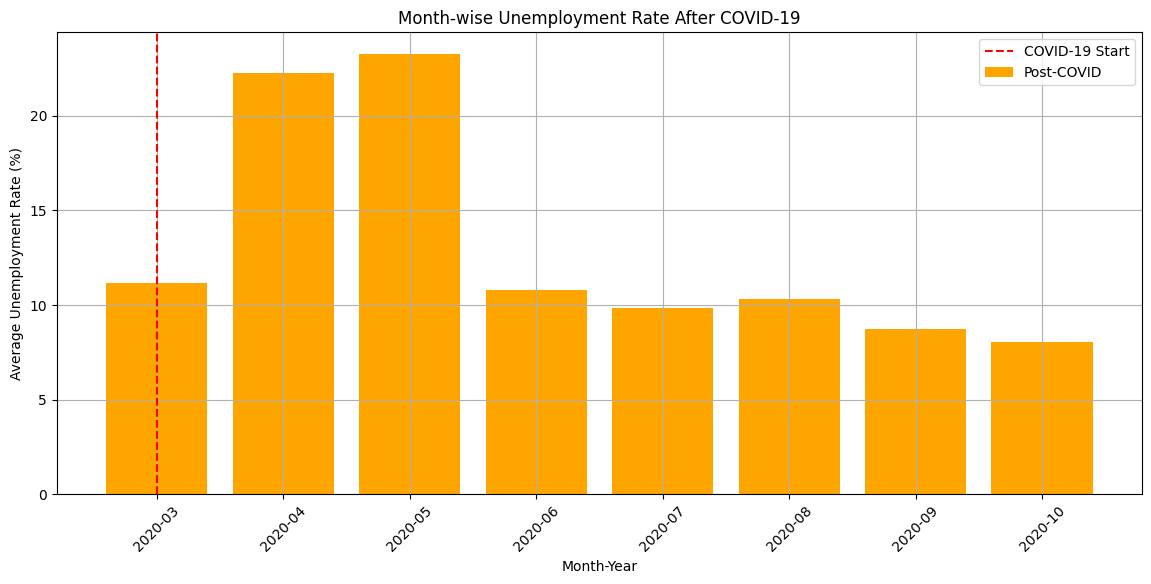

In [50]:
import matplotlib.pyplot as plt

# Resample data by month and calculate the mean unemployment rate
combined_data['Date'] = combined_data['Date'].dt.to_period('M').dt.to_timestamp()
monthly_data = combined_data.groupby(['Date'])['Estimated Unemployment Rate (%)'].mean().reset_index()

# Separate the data into pre-COVID and post-COVID periods
covid_start_date = pd.to_datetime('2020-03-01')
pre_covid_data = monthly_data[monthly_data['Date'] < covid_start_date]
post_covid_data = monthly_data[monthly_data['Date'] >= covid_start_date]

# Plot the pre-COVID data
plt.figure(figsize=(14, 6))
plt.bar(pre_covid_data['Date'].dt.strftime('%Y-%m'), pre_covid_data['Estimated Unemployment Rate (%)'], color='skyblue', label='Pre-COVID')
plt.axvline(x=covid_start_date.strftime('%Y-%m'), color='red', linestyle='--', label='COVID-19 Start')
plt.xlabel('Month-Year')
plt.ylabel('Average Unemployment Rate (%)')
plt.title('Month-wise Unemployment Rate Before COVID-19')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# Plot the post-COVID data
plt.figure(figsize=(14, 6))
plt.bar(post_covid_data['Date'].dt.strftime('%Y-%m'), post_covid_data['Estimated Unemployment Rate (%)'], color='orange', label='Post-COVID')
plt.axvline(x=covid_start_date.strftime('%Y-%m'), color='red', linestyle='--', label='COVID-19 Start')
plt.xlabel('Month-Year')
plt.ylabel('Average Unemployment Rate (%)')
plt.title('Month-wise Unemployment Rate After COVID-19')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()